In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Load Data


In [16]:
df = pd.read_csv("WineQT.csv")

print(df.shape)
df.head()


(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Struktur & Tipe Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Statistik Deskriptif

In [18]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## Missing Value (NaN)

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Data Duplikat

In [19]:
df.duplicated().sum()


0

In [24]:
df = df.drop(columns=["Id"])


## Distribusi Numerik

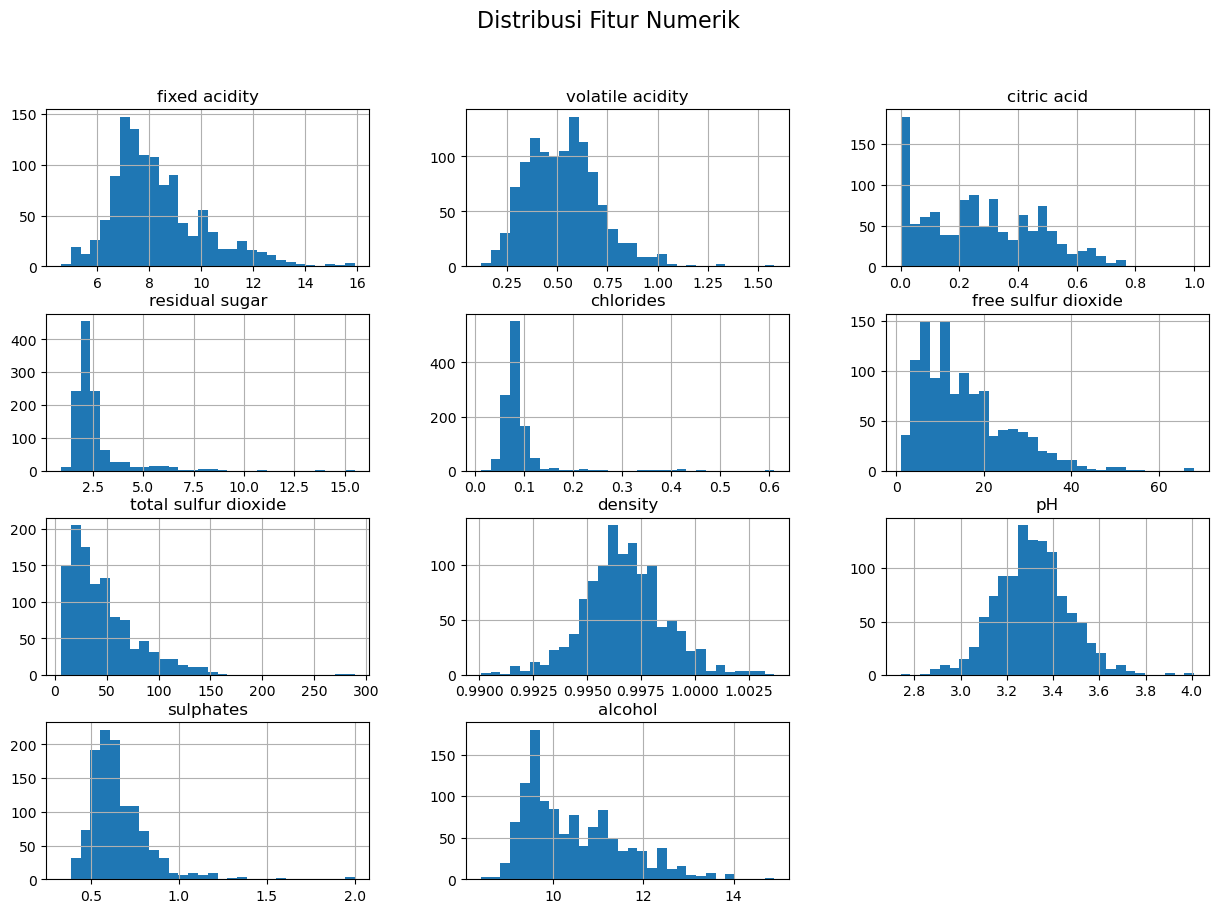

In [25]:
num_cols = df.columns.drop("quality")

df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()


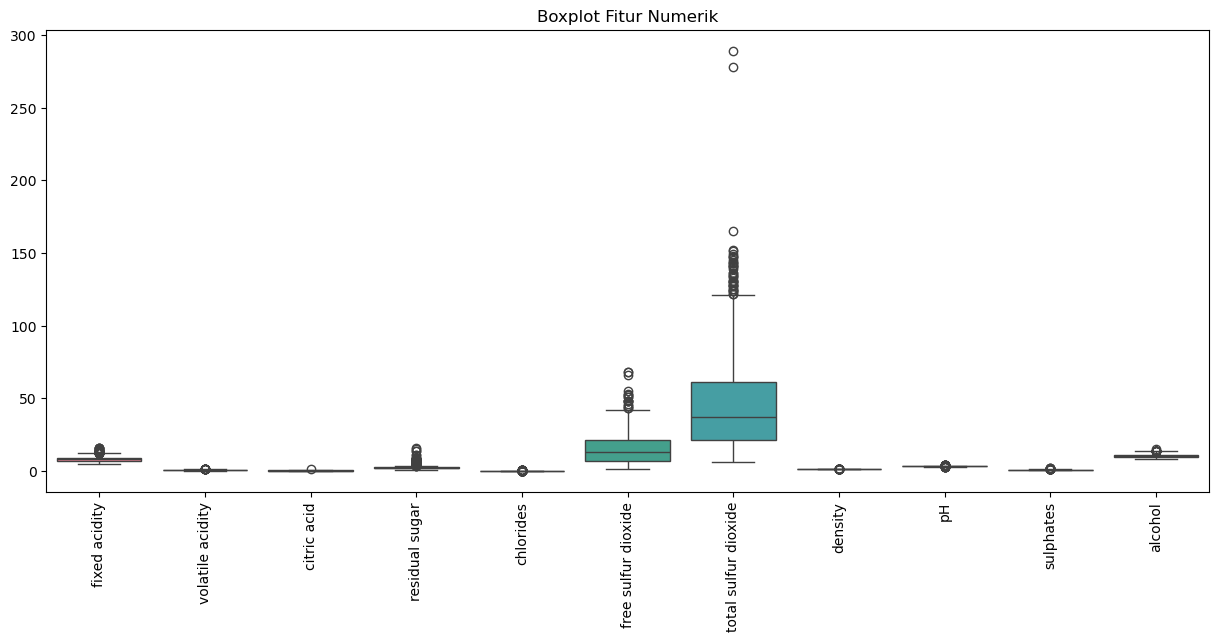

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot Fitur Numerik")
plt.show()


## Analisis Target Variabel

In [29]:
df["quality"].value_counts().sort_index()


quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [30]:
df["quality"].value_counts(normalize=True).sort_index() * 100


quality
3     0.524934
4     2.887139
5    42.257218
6    40.419948
7    12.510936
8     1.399825
Name: proportion, dtype: float64

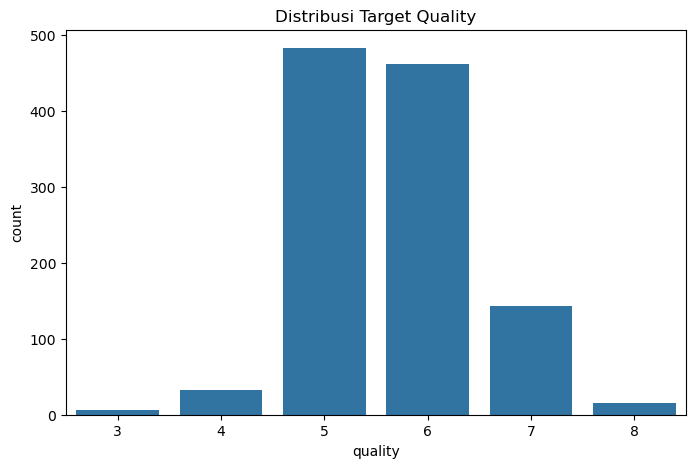

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df)
plt.title("Distribusi Target Quality")
plt.show()


## Korelasi Antar Fitur


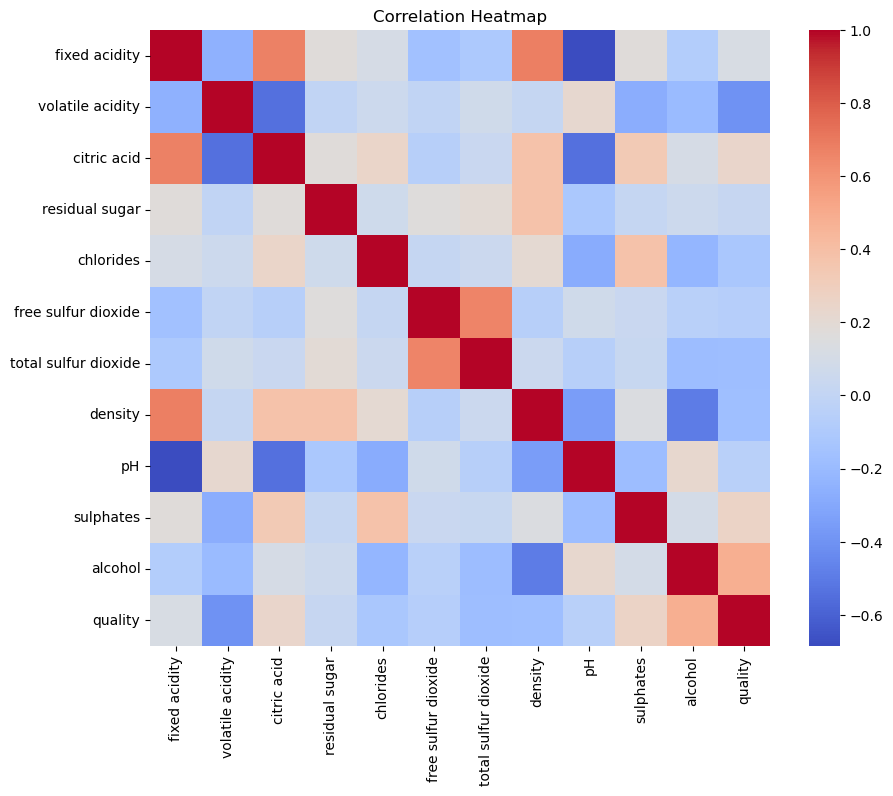

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


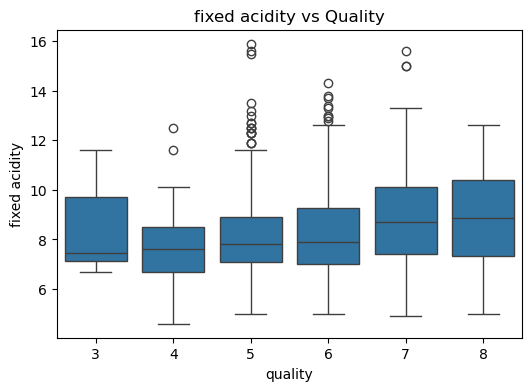

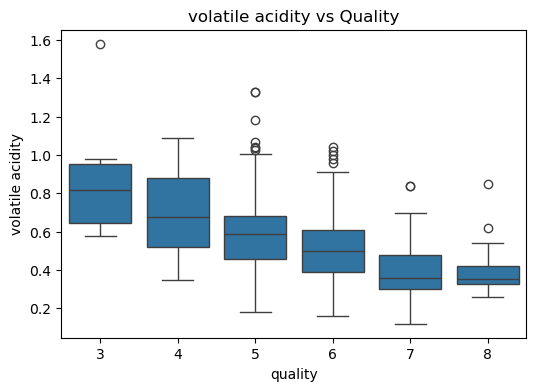

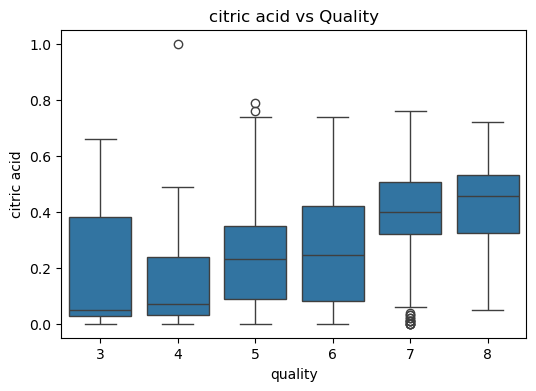

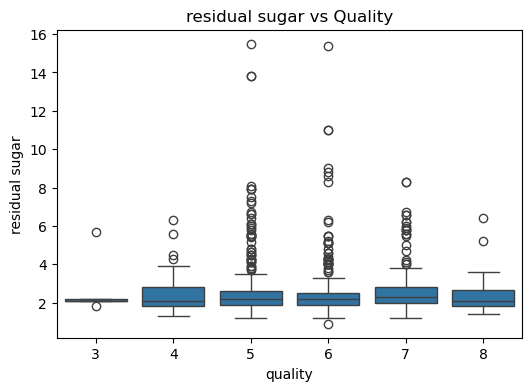

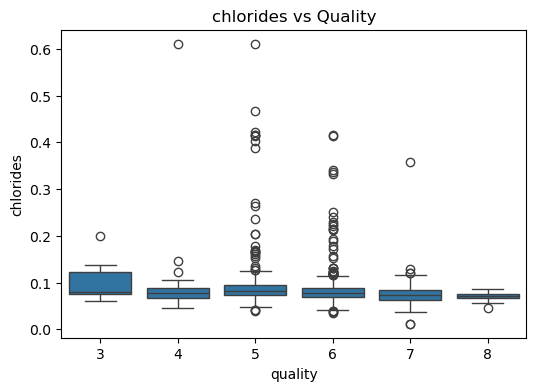

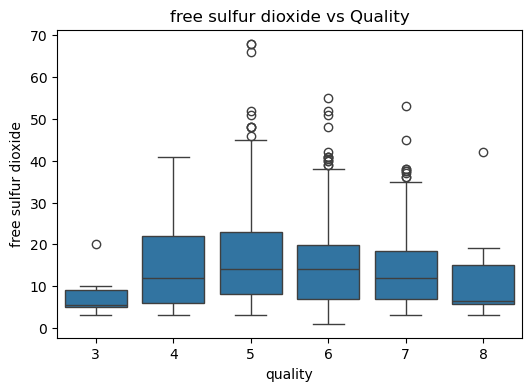

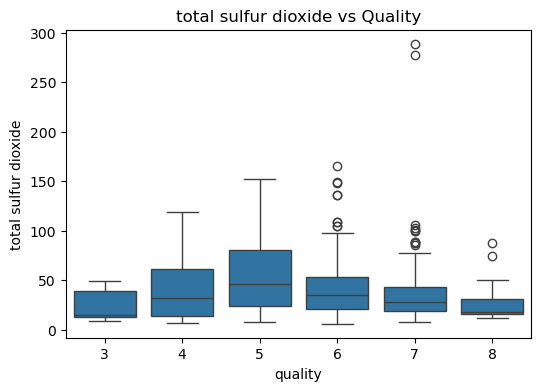

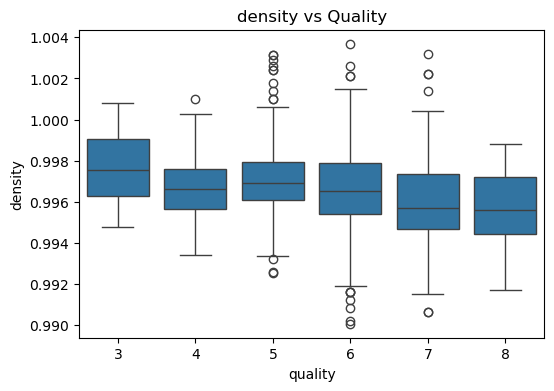

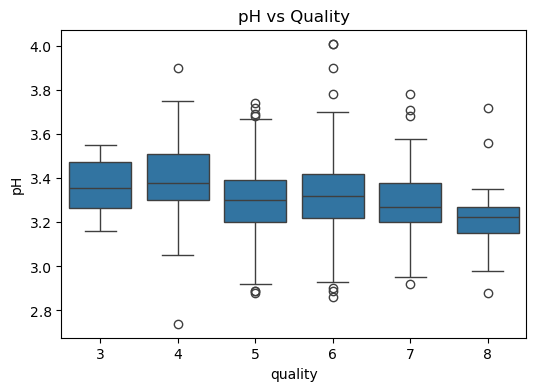

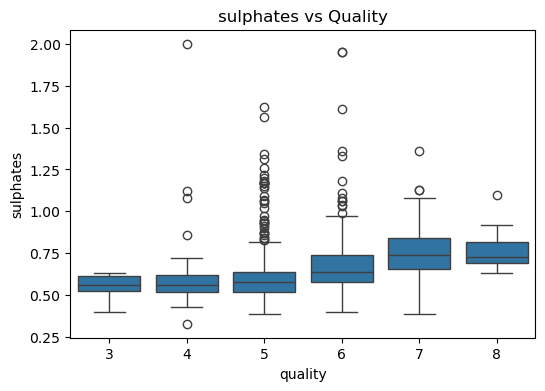

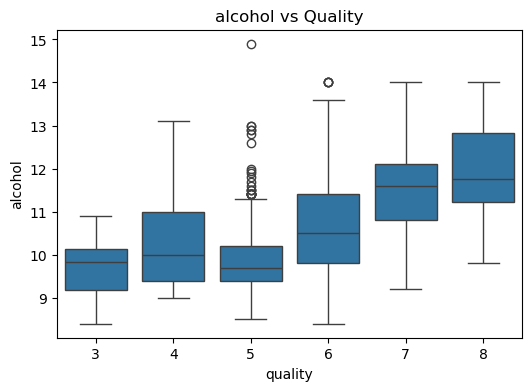

In [33]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="quality", y=col, data=df)
    plt.title(f"{col} vs Quality")
    plt.show()
